*M.A.H.C.L. van Riel,  
[m.a.h.c.l.vanriel@tilburguniversity.edu](http://www.lifewithcats.tv/wp-content/uploads/2011/12/123.jpg)*  
![](http://cdn.lowgif.com/small/5d31ab1f4d0cd3b6-rocket-ship-animated-gif-on-behance.gif ""Engage thrusters..!"")

Onderzoeksproject Investeren en Beleggen 2018
---
___
In deze Jupyter Notebook worden de gevonde gegevens voor de Mean en de Variance van Finse aandelen en een Finse Index geplot, voor het *onderzoeksproject Investeren en Beleggen*. Hierbij wordt gebruik gemaakt van de library `ggplot2`. Er wordt gekeken naar 18 verschillende bedrijven in steekproef van **31-05-2006** tot en met **31-01-2018**. Hierbij wordt de dataset onderverdeeld in twee periodes. In deze notebook wordt alleen de *vroege periode* bekeken. Dit is de periode van **31-05-2006** tot en met **31-05-2012**. 
___
Aller eerst worden de eerste benodigde packeges geïmporteerd. Verderop in het notebook zullen er nog een aantal geïmporteerd worden. Om te beginnen importeren we:  
* `readxl` om het excel bestand met de data te importeren.
* `ggplot2` om de data te visualiseren volgens de *Gramar of Graphycs*.
* `ggthemes` om de plot visueel te bewerken m.b.t. de achtergrond.

In [88]:
library(readxl)
library(ggplot2)
install.packages("ggthemes") # Install 
library(ggthemes) # Load

Warning message:
"package 'ggthemes' is in use and will not be installed"

Data importeren
---
___
Allereerst moet de benodigde data geïmporteerd worden. In dit geval staan onze gegevens in het bestand *"FIN_returns.xlsx"*. Het bestand wordt opgeslagen als `rendement`. Om de datapunten te kunnen identificeren, worden labels aangebracht die corresponderen met de data in het bestand *"Code.xlsx"*. Deze dataset wordt opgeslagen onder de naam `code`.

In [89]:
rendement <- read_xlxs("../Sourcedata/FIN_returns.xlxs")

ERROR: Error in read_xlxs("../Sourcedata/FIN_returns.xlxs"): could not find function "read_xlxs"


In [90]:
getwd()

[1] "C:/Users/s160015/Investeren en Beleggen/Sourcedata"

In [91]:
setwd('C:/Users/s160015/Investeren en Beleggen/Sourcedata')

In [92]:
rendement <- read_xlsx("../Sourcedata/FIN_returns.xlsx")
code <- read_xlsx("../Sourcedata/Code.xlsx")

In [93]:
?ggplot2

Om te kunnen werken met de spreadsheets van excel, moeten de datasets omgezet worden tot dataframes. Dit wordt gedaan door het commando `data.frame()`. Van beide bestanden `rendement` en `code`, maken we een dataframe `rendement_df` en `code_df` respectievelijk. 

In [94]:
rendement_df <- data.frame(rendement)
code_df <- data.frame(code)
rendement_df
code_df

Average,Standard.Deviation,Standard.Error,Minimum,Maximum
0.002409486,0.11429515,0.013469812,-0.3769575,0.4761905
0.002955322,0.06847045,0.008069320,-0.2174797,0.1381346
-0.001108431,0.07360544,0.008674484,-0.1852385,0.1627639
-0.006647790,0.15782371,0.018599703,-0.3715847,0.7676768
0.009594083,0.11807704,0.013915513,-0.2654773,0.2847996
0.016322100,0.07488831,0.008825672,-0.1414241,0.3390931
0.005144319,0.19144133,0.022561577,-0.4660194,0.9615385
0.008411766,0.13168629,0.015519378,-0.3930836,0.3168755
-0.021706697,0.11135439,0.013123241,-0.3350909,0.2308433
0.002139971,0.10440717,0.012304503,-0.2295423,0.5214724


Code
946457(PI)~E
698783(PI)~E
690351(PI)~E
688027(PI)~E
866457(PI)~E
772959(PI)~E
772967(PI)~E
505967(PI)~E
729882(PI)~E
284310(PI)~E


Data plotten
---
___
Voordat de data geplot kan worden, moeten de volgende packeges geïmporteerd worden:
* `tidyverse` alleen geïnstalleerd, niet geïmporteerd. Back-up voor `ggplot2`.
* `ggrepel` om de labels duidelijk bij de punten weer te geven. 

In [ ]:
install.packages("tidyverse")
install.packages("ggrepel")
library(ggrepel)

___
Met behulp van `ggplot()` kan nu de data geplot worden. M.b.v. de geïmporteerde packeges kan de plot voorzien worden van kleur, labels, achtergrond, etc. Hieronder worden 3 verschillende plots gemaakt. De 1e twee verschillen lauter en alleen door de kleur van de data punten. De 3e heeft een correlatie lijn (niet de Mean-Variance-Frontier !!) met standaard error vlak rond om.  
Door het gebruik van `ggsave()` kan de plot opgeslagen worden als png, jpg, etc. om zo te gebruiken in het raport. 
___

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


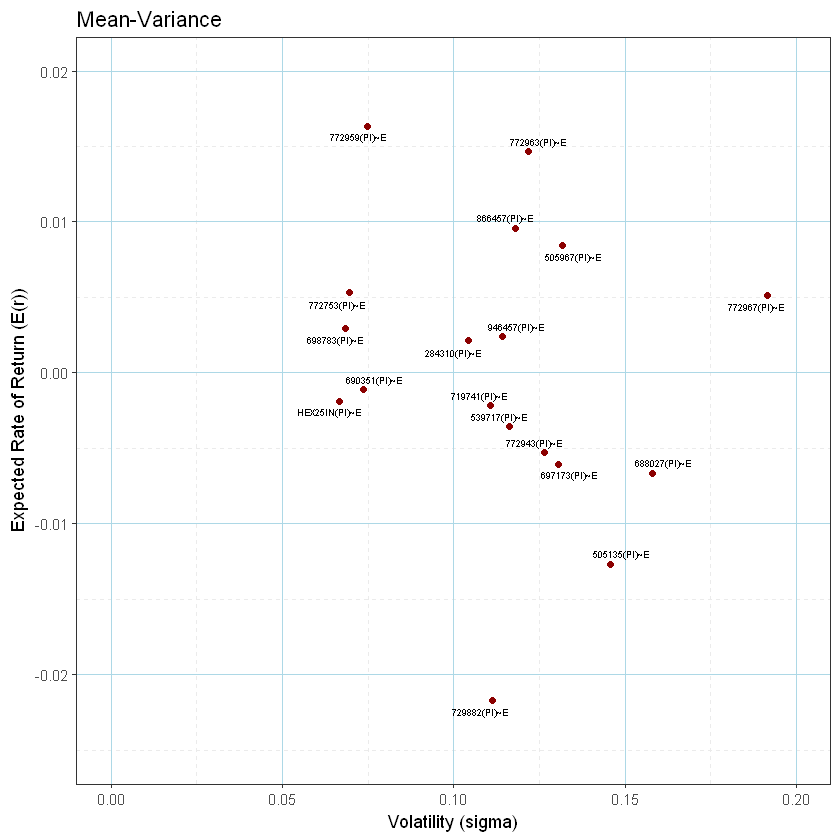

In [84]:
plot_darkred <- ggplot(rendement_df, aes(Standard.Deviation, Average)) +
geom_point(col = "darkred") +
geom_text_repel(aes(label = code_df),size = 2, col = "black") +
scale_y_continuous("Expected Rate of Return (E(r))",
                   limits = c(-0.025, 0.02)) +
scale_x_continuous("Volatility (sigma)",
                   limits = c(0, 0.20)) +
theme_bw() +
theme(panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "lightblue"),
      panel.grid.minor = element_line(size = 0.1, linetype = 'dashed')) +
ggtitle("Mean-Variance")
plot_darkred
ggsave("Mean-Variance_plot.jpg")

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


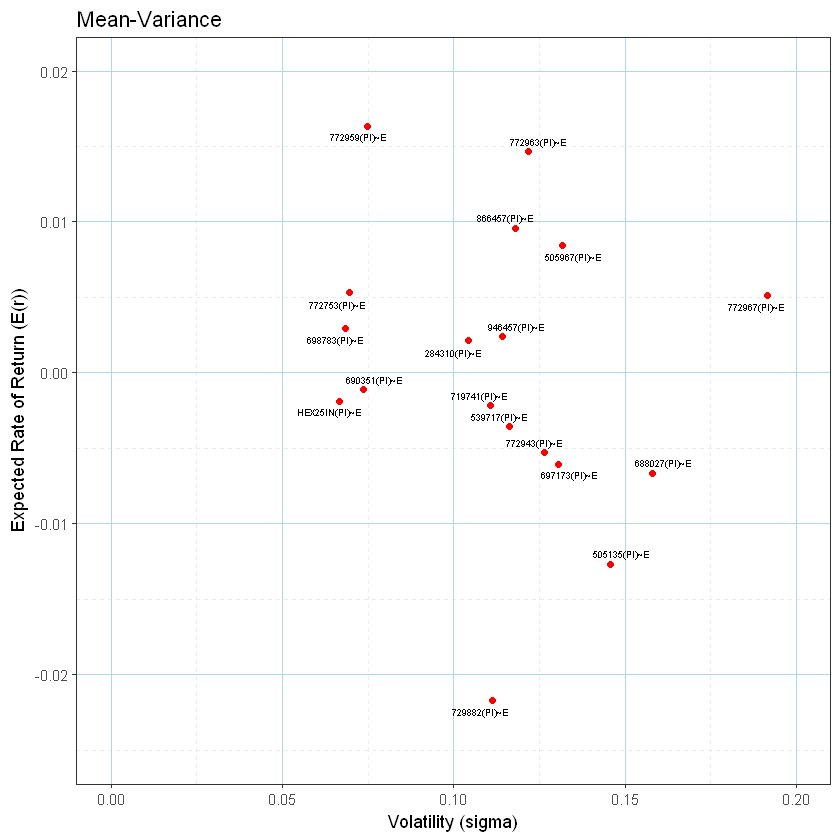

In [70]:
plot_red <- ggplot(rendement_df, aes(Standard.Deviation, Average)) +
geom_point(col = "red") +
geom_text_repel(aes(label = code_df),size = 2, col = "black") +
scale_y_continuous("Expected Rate of Return (E(r))",
                   limits = c(-0.025, 0.02)) +
scale_x_continuous("Volatility (sigma)",
                   limits = c(0, 0.20)) +
theme_bw() +
theme(panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "lightblue"),
      panel.grid.minor = element_line(size = 0.1, linetype = 'dashed')) +
ggtitle("Mean-Variance")
plot_red

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


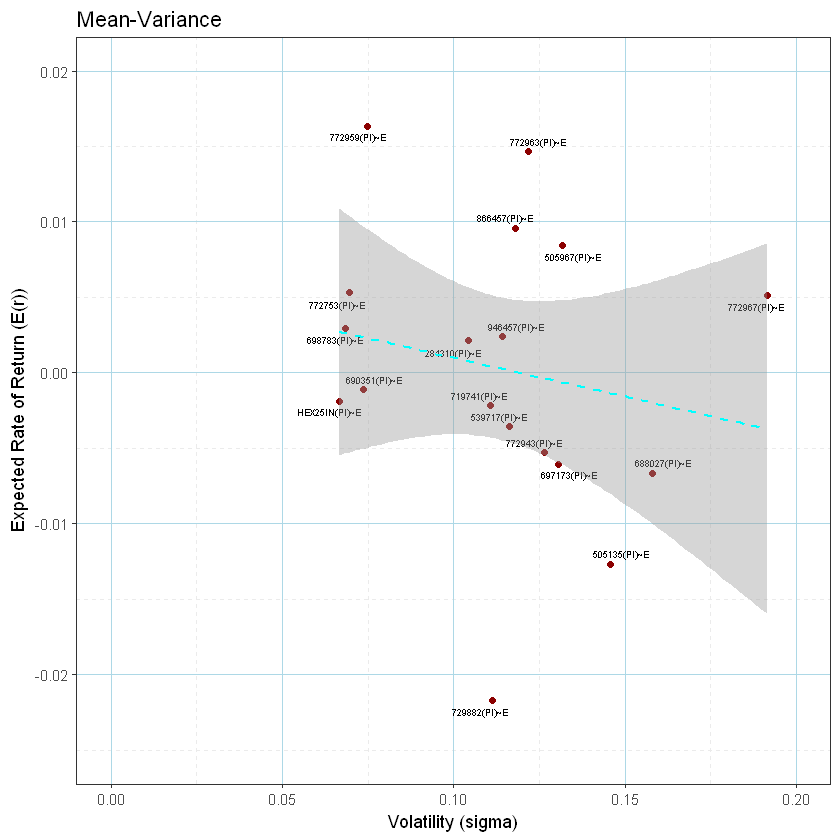

In [82]:
plot_darkred +
stat_smooth(method = 'lm', colour = "cyan", size = .75, linetype = 'dashed')

In [83]:
ggsave("Mean-Variance plot.png")

Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
